In [3]:
# import data
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib inline

In [4]:
df = pd.read_csv('Resources/atech_data.csv')

In [5]:
df.drop(columns=['ID_VENTE', 'ID_ARTICLE', 'ID_CLIENT', 'ID_ETABLISSEMENT', 'LIBELLE_VENTE', 'DEVISE_VENTE'], inplace=True)
df.head()


,PRIX_VENTE,DATE_VENTE,ANNEE_VENTE
0,1050.55,1/2/2007,2007
1,14.35,1/2/2007,2007
2,1894.46,1/3/2007,2007
3,28.70,1/3/2007,2007
4,13.06,1/3/2007,2007


In [7]:
df.index = df.DATE_VENTE

In [8]:
df.head()

,PRIX_VENTE,DATE_VENTE,ANNEE_VENTE
DATE_VENTE,,,
1/2/2007,1050.55,1/2/2007,2007
1/2/2007,14.35,1/2/2007,2007
1/3/2007,1894.46,1/3/2007,2007
1/3/2007,28.70,1/3/2007,2007
1/3/2007,13.06,1/3/2007,2007


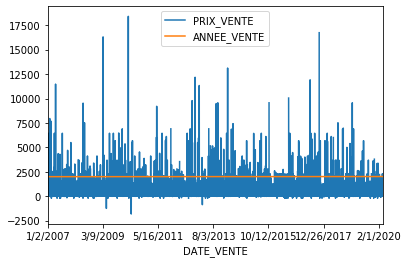

In [9]:
df.plot()

In [10]:
sarimax_model = SARIMAX(df['PRIX_VENTE'],order=(1,1,1),seasonal_order=(1,1,1,4),exog=df['ANNEE_VENTE'])

C:\Users\12144\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\12144\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [11]:
res = sarimax_model.fit(disp=False)

C:\Users\12144\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [12]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        PRIX_VENTE   No. Observations:                12142
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood              -99500.431
Date:                           Wed, 24 Jun 2020   AIC                         199012.862
Time:                                   12:17:19   BIC                         199057.286
Sample:                                        0   HQIC                        199027.755
                                         - 12142                                         
Covariance Type:                             opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ANNEE_VENTE    -0.1364      1.327     -0.103      0.918      -2.738       2.465
ar.L1           0.0295      0.030      0.995      0.320      -0.029       0.088
ma.L1          -0.9955      0.004   -266.696      0.000      -1.003      -0.988
ar.S.L4        -0.0429      0.038     -1.143      0.253      -0.117       0.031
ma.S.L4        -1.0000      0.007   -152.032      0.000      -1.013      -0.987
sigma2       2.227e+06      2e-07   1.12e+13      0.000    2.23e+06    2.23e+06
===================================================================================
Ljung-Box (Q):                       44.12   Jarque-Bera (JB):           2613122.11
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             6.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        73.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.63e+29. Standard errors may be unstable.
"""